In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt


In [2]:
csv_files = [file for file in os.listdir('.') if file[-4:]=='.csv']
csv_files

['score_accompaniment.csv', 'score_harmony.csv', 'score.csv']

In [7]:
dict = {}
for csv_file in csv_files:
    result = pd.read_csv(csv_file)
    # print('{file}:\n\taverage accuracy: {acc}, median accuracy: {med}'.format(file=csv_file, acc=result['accuracy'].mean(), med=result['accuracy'].median() ) )
    dict[csv_file] = [result['accuracy'].mean(), result['accuracy'].median()]
csv_data = pd.DataFrame(dict)
csv_data.index = ['mean', 'median']
csv_data

,score_accompaniment.csv,score_harmony.csv,score.csv
mean,0.645688,0.658110,0.658176
median,0.667730,0.684262,0.679434


In [8]:
os.getcwd()


'/home/0860234/Doc/Chord_Recognition'

In [9]:
os.chdir('../CE200')
os.getcwd()

'/home/0860234/Doc/CE200'

In [10]:
x = pd.read_csv('1/shorthand_gt.txt', sep='\t', header=None)
x

,0,1,2
0,0.000000,10.959615,N
1,10.959615,12.021958,D:maj
2,12.021958,13.709604,B:min
3,13.709604,14.751776,G:maj
4,14.751776,16.452869,D:maj
...,...,...,...
117,188.271076,189.287161,G:maj
118,189.287161,190.922985,D:maj
119,190.922985,191.939069,G:maj
120,191.939069,198.143670,D:maj


In [11]:
total_time_inference = {}
total_occ_inference = {}


In [12]:
for subdirs, dirs, files in os.walk('.'):
    for file in files:
        if file == 'shorthand_gt.txt':
            data = pd.read_csv(os.path.join(os.getcwd(), subdirs, file), sep='\t', header=None)
            for index, row in data.iterrows():
                if row[2] in total_time_inference:
                    total_time_inference[row[2]] += row[1]-row[0]
                else:
                    total_time_inference[row[2]] = row[1]-row[0]
                if row[2] in total_occ_inference:
                    total_occ_inference[row[2]] += 1
                else:
                    total_occ_inference[row[2]] = 1

# total_time_inference, total_occ_inference            
            

In [13]:
chord_target = ['N', 'C:maj', 'C#:maj', 'D:maj', 'D#:maj', 'E:maj', 'F:maj', 'F#:maj', 'G:maj', 'G#:maj', 'A:maj', 'A#:maj', 'B:maj', 'C:maj7', 'C#:maj7', 'D:maj7', 'D#:maj7', 'E:maj7', 'F:maj7', 'F#:maj7', 'G:maj7', 'G#:maj7', 'A:maj7', 'A#:maj7', 'B:maj7', 'C:min', 'C#:min', 'D:min', 'D#:min', 'E:min', 'F:min', 'F#:min', 'G:min', 'G#:min', 'A:min', 'A#:min', 'B:min', 'C:min7', 'C#:min7', 'D:min7', 'D#:min7', 'E:min7', 'F:min7', 'F#:min7', 'G:min7', 'G#:min7', 'A:min7', 'A#:min7', 'B:min7', ]
total_occ_inference_target = dict( (key, value) for (key, value) in total_occ_inference.items() if key in chord_target ) 
total_time_inference_target = dict( (key, value) for (key, value) in total_time_inference.items() if key in chord_target ) 

In [14]:
total_occ_inference_target

{'N': 569,
 'C:min': 399,
 'G:min': 242,
 'A:maj': 1047,
 'B:maj': 646,
 'C#:min': 381,
 'G#:min': 168,
 'G:maj': 1082,
 'D:min7': 226,
 'G:min7': 291,
 'A:min7': 358,
 'A:maj7': 97,
 'F:maj': 856,
 'C:maj': 1005,
 'A:min': 423,
 'D:min': 253,
 'C#:min7': 194,
 'E:maj7': 86,
 'E:maj': 757,
 'F#:min': 314,
 'D:maj': 996,
 'B:min': 300,
 'B:min7': 273,
 'F#:min7': 158,
 'E:min7': 279,
 'F:min': 268,
 'D:maj7': 97,
 'C:min7': 212,
 'E:min': 472,
 'F#:maj': 263,
 'G:maj7': 132,
 'A#:min': 23,
 'A#:maj': 3,
 'D#:min': 42,
 'C#:maj': 78,
 'G#:maj7': 1,
 'G#:min7': 123,
 'F:min7': 295,
 'D#:min7': 65,
 'F:maj7': 200,
 'C:maj7': 126,
 'A#:min7': 15,
 'B:maj7': 11,
 'F#:maj7': 2,
 'G#:maj': 21,
 'D#:maj': 5}

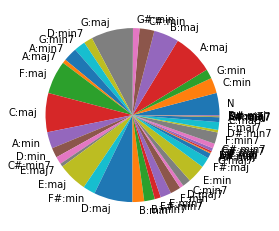

In [15]:
plt.pie(total_occ_inference_target.values(), labels=total_occ_inference_target.keys())
plt.show() 
# FIXME: change to percentage bar plot



In [16]:

os.chdir('../BTC_data/')
total_occ_train = {}
total_time_train = {}


In [17]:
for subdirs, dirs, files in os.walk('.'):
    for file in files:
        if file[-4:] == '.lab' or file[-4:] == '.txt':
            if (subdirs[:24] == './The_Beatls_Annotations'):
                data = pd.read_csv(os.path.join(os.getcwd(), subdirs, file), sep=' ', header=None)
            else:
                data = pd.read_csv(os.path.join(os.getcwd(), subdirs, file), sep='\t', header=None)
            for index, row in data.iterrows():
                if row[2] in total_time_train:
                    total_time_train[row[2]] += row[1]-row[0]
                else:
                    total_time_train[row[2]] = row[1]-row[0]
                if row[2] in total_occ_train:
                    total_occ_train[row[2]] += 1
                else:
                    total_occ_train[row[2]] = 1

# total_time_train, total_occ_train            
            

In [18]:
total_occ_train_target = dict( (key, value) for (key, value) in total_occ_train.items() if key in chord_target ) 
total_time_train_target = dict( (key, value) for (key, value) in total_time_train.items() if key in chord_target ) 

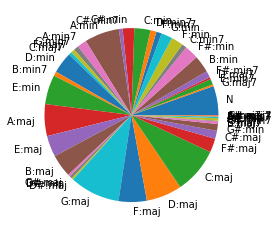

In [19]:
plt.pie(total_occ_train_target.values(), labels=total_occ_train_target.keys())
plt.show() 


In [39]:
summary = pd.DataFrame([total_occ_inference_target, total_time_inference_target, total_occ_train_target, total_time_train_target])
summary.index = ['occ_inf', 'time_inf', 'occ_train', 'time_train']
summary.T

,occ_inf,time_inf,occ_train,time_train
N,569.0,3072.547707,1117.0,4942.436385
C:min,399.0,950.722740,617.0,1375.913754
G:min,242.0,428.736515,426.0,890.187235
A:maj,1047.0,2184.753292,1222.0,2739.546838
B:maj,646.0,1331.721779,873.0,1741.974147
C#:min,381.0,831.542797,448.0,1043.955397
G#:min,168.0,412.935949,261.0,519.663236
G:maj,1082.0,2027.172724,1931.0,3999.702689
D:min7,226.0,612.386987,233.0,497.704592
G:min7,291.0,671.208031,189.0,384.969353
